# [k近傍法] 個数と価格から売れるか売れないかを判定する
Copyright © 2022 田中裕行 All rights reserved.

## (1) 学習データを用意する

In [1]:
import pandas as pd

quantity  = [  5,   3,   2,   4,   1] # 個数
price     = [500, 300, 200, 400, 100] # 価格
result    = [  0,   1,   1,   0,   0] # 結果(1=売れる、0=売れない)
df = pd.DataFrame(list(zip(quantity,price,result)), columns = ['quantity','price', 'result'])
df

,quantity,price,result
0,5,500,0
1,3,300,1
2,2,200,1
3,4,400,0
4,1,100,0


## (2) データの内訳を確認する

In [2]:
# 結果の種類を確認
print(df['result'].unique())

[0 1]


In [3]:
# 「売れた」と「売れなかった」の数を確認
print('売れた      ：' ,len(df.loc[df['result']==1]))
print('売れなかった：' ,len(df.loc[df['result']==0]))

売れた      ： 2
売れなかった： 3


## (3) グラフで視覚化する

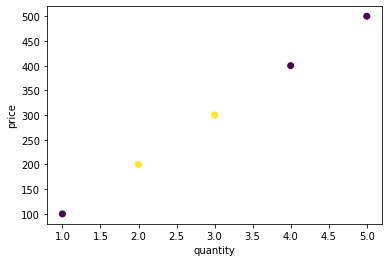

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['quantity'] ,df['price'], c=df['result'])
plt.xlabel('quantity')                  
plt.ylabel('price')
plt.show()

## (4) 学習する変数を分ける

In [5]:
X = df[['quantity','price']] # 説明変数(販売個数、販売価格)
y = df['result']             # 目的変数(結果)

## (5) 機械に学習させる

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn_cls = KNeighborsClassifier(n_neighbors=3).fit(X, y)

## (6) テストデータを作成する

In [7]:
test_quantity = [3] # 個数(3個)
test_price = [450]  # 価格(450円)
df2 = pd.DataFrame(list(zip(test_quantity, test_price)), columns = ['quantity','price'])
df2

,quantity,price
0,3,450


## (7) 機械に予測させる

In [8]:
y_pred = kn_cls.predict(df2)
if y_pred[0] == 1:
  ans = '売れます'
else:
  ans = '売れません'
print('個数が{}個、価格が{}円だと、{}。'
  .format(test_quantity[0],test_price[0] ,ans))

個数が3個、価格が450円だと、売れません。
